In [1]:
import numpy as np
from pathlib import Path
import skimage

In [2]:
ASSETS_FOLDER_PATH = "./assets"
OUTPUT_FOLDER_PATH = "."

In [3]:
Path(OUTPUT_FOLDER_PATH).mkdir(parents=True, exist_ok=True)

Cargamos la imagen

In [4]:
lena = skimage.io.imread(fname=f"{ASSETS_FOLDER_PATH}/lena_gray.tif")

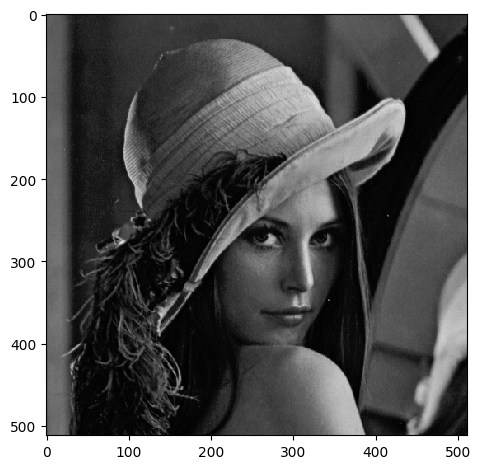

In [5]:
skimage.io.imshow(lena)

In [6]:
def linear_mapping(image: np.ndarray, interval: tuple[float, float]) -> np.ndarray:
    mapped_image = np.zeros(image.shape)

    MAX_PIXEL_VAL = 255
    MIN_PIXEL_VAL = 0
    PIXEL_VAL_RANGE = MAX_PIXEL_VAL - MIN_PIXEL_VAL
    
    max_val = interval[1] * PIXEL_VAL_RANGE + MIN_PIXEL_VAL
    min_val = interval[0] * PIXEL_VAL_RANGE + MIN_PIXEL_VAL
    val_range = max_val - min_val

    for n_row in range(image.shape[0]):
        for n_col in range(image.shape[1]):
            mapped_image[n_row, n_col] = (image[n_row, n_col] - MIN_PIXEL_VAL) / PIXEL_VAL_RANGE
            mapped_image[n_row, n_col] = mapped_image[n_row, n_col] * val_range + min_val

            if mapped_image[n_col, n_col] > MAX_PIXEL_VAL:
                mapped_image[n_col, n_col] = MAX_PIXEL_VAL
            elif mapped_image[n_col, n_col] < MIN_PIXEL_VAL:
                mapped_image[n_col, n_col] = MIN_PIXEL_VAL

    return mapped_image.astype('uint8')

In [7]:
lena2 = linear_mapping(lena, [0, 1])

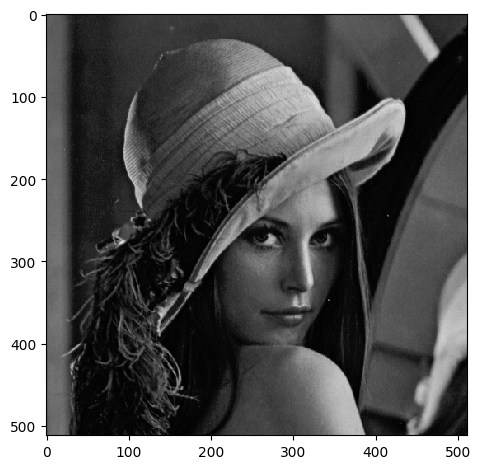

In [8]:
skimage.io.imshow(lena2)

In [9]:
lena_q1 = linear_mapping(lena, [0.25, 0.5])

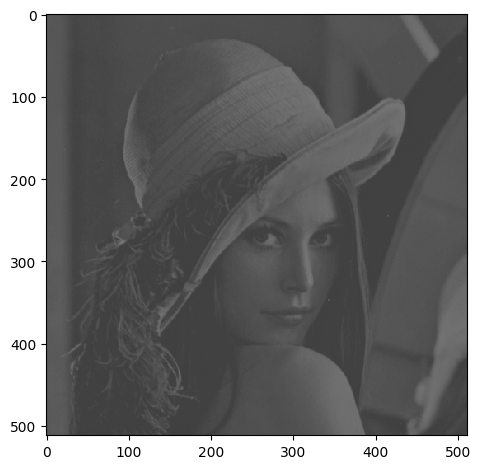

In [10]:
skimage.io.imshow(lena_q1)